## Importing some packages


In [203]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the csv files 

In [204]:
movies = pd.read_csv("./DataSet/movies.csv")
ratings = pd.read_csv("./DataSet/ratings.csv")

# Displaying a sample of the dataset


In [206]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [207]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Preprocessing

In [208]:
RatedMovies=pd.merge(movies,ratings,how='outer',on='movieId')
RatedMovies.head()
# displaying the head of the resulted dataframe after merging

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09


In [209]:
final_dataset = pd.pivot_table(RatedMovies,values='rating',index=['movieId','title'],columns='userId')
final_dataset.head()

,userId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,601.0,602.0,603.0,604.0,605.0,606.0,607.0,608.0,609.0,610.0
movieId,title,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,Jumanji (1995),NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,Grumpier Old Men (1995),4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,Waiting to Exhale (1995),NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Father of the Bride Part II (1995),NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
final_dataset.fillna(0,inplace=True) #filling the null values with zeros
final_dataset.head()

,userId,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,601.0,602.0,603.0,604.0,605.0,606.0,607.0,608.0,609.0,610.0
movieId,title,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,Jumanji (1995),0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,Grumpier Old Men (1995),4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,Waiting to Exhale (1995),0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Father of the Bride Part II (1995),0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [213]:
no_user_voted = RatedMovies.groupby('movieId')['rating'].agg('count')  
no_movies_voted = RatedMovies.groupby('userId')['rating'].agg('count')
#splitting movies data based on the number of rating users
#splitting users data based on the number of rated movies

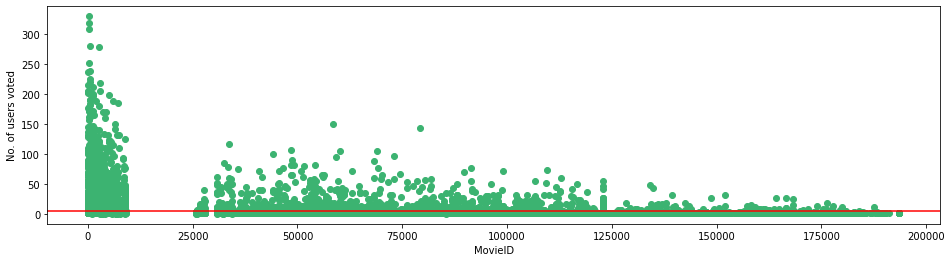

In [214]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=5,color='r')
plt.xlabel('MovieID')
plt.ylabel('No. of users voted')
plt.show()

In [215]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 5].index,:] #filtering movies
#removing movies that have been rated by 10 users only or less

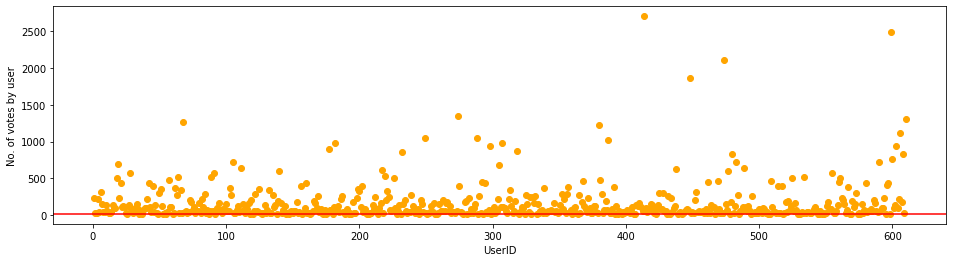

In [216]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='orange')
plt.axhline(y=15,color='r')
plt.xlabel('UserID')
plt.ylabel('No. of votes by user')
plt.show()

In [217]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 15].index] #filtering users
#removing users that have rated 50 movies or less

## Removing sparsity


In [218]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size)) #sparsity = amount of zeros in an array
csr_sample = csr_matrix(sample)
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True) #Adding new sequential index to "final_dataset" values after removing sparsity


In [251]:
final_dataset
final_dataset[final_dataset['title'].str.contains('up',False)]
#csr_data.shape

userId,movieId,title,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,601.0,602.0,603.0,604.0,605.0,606.0,607.0,608.0,609.0,610.0
46,60,"Indian in the Cupboard, The (1995)",0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
75,107,Muppet Treasure Island (1996),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
84,140,Up Close and Personal (1996),0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
246,414,"Air Up There, The (1994)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
280,468,Englishman Who Went Up a Hill But Came Down a ...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,87306,Super 8 (2011),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
2968,88163,"Crazy, Stupid, Love. (2011)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2971,88785,"Change-Up, The (2011)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2991,91094,"Muppets, The (2011)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Classification

In [224]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)


NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [272]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10   #as we will need 10 similar movies
    movie_list = final_dataset[final_dataset['title'].str.contains(movie_name,False)]
    
    #to return the title of the required movie (incase sensitivity)
    if len(movie_list):
        if len(movie_list)!=1:
            for i in range(0 , len(movie_list)):
                print(str(i)  +'--->' + movie_list.iloc[i]['title'])
            inx = input('Enter the index of the Movi you need')
            if(int(inx) > len(movie_list)-1):
                return 'invalid input'
            elif int(inx) <0 or inx=='':
                
                return 'invalid input'
        else:
            inx = 0
        
        movie_idx= movie_list.iloc[int(inx)]['movieId'] #gets the ID of the first matching movie title
        print(movie_idx)
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0] 
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        #creating a list of recommended movies indices and a list of distances to the entered movie
        recommend_frame = [] #initializing a new list of recommended movies
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId'] #movie ID of recommended movies
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
            #Displaying the title of recommended movies and the distance between them and the entered movie
        recommend_frame.reverse()
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        #Create a dataframe "df" containing the "recommend_frame" list
        return df
    else:
        return "No movies found. Please check your input"

 ## Enter the movie name and the 10 most similar movies based on the user's rating will be displayed

In [285]:
get_movie_recommendation('thor') 

0--->Thor (2011)
1--->Thor: The Dark World (2013)
2--->Thor: Ragnarok (2017)
Enter the index of the Movi you need0
86332


,Title,Distance
1,Captain America: The First Avenger (2011),0.252103
2,Thor: The Dark World (2013),0.334726
3,Avengers: Age of Ultron (2015),0.358935
4,"Incredible Hulk, The (2008)",0.362463
5,X-Men: First Class (2011),0.377001
6,X-Men: Days of Future Past (2014),0.382778
7,"Avengers, The (2012)",0.385760
8,Guardians of the Galaxy (2014),0.405242
9,Iron Man (2008),0.410508
10,Iron Man 2 (2010),0.412239
